In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Study/DL main project

/content/drive/MyDrive/Study/DL main project


# **IMPORT LIBRARIES**

In [3]:
import os

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

from glob import glob
from process_data import ProcessData
from tqdm.auto import tqdm

In [4]:
from keras.models import load_model

In [5]:
pdata = ProcessData(seed=42)

# **Load-Process Data**

In [7]:
# csv_path = './csv/14/001.csv'
# img_load_dir = './train/png/12'
csv_path = './csv/14/001.csv'
img_load_dir = './train/png/14/001'

In [8]:
df = pd.read_csv(csv_path)
df.head(5)

,Unnamed: 0,Unnamed: 0.1,index,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,96,96,210,55522f91d2da99602696a2c6b0b5f42a,No finding,14,R5,NaN,NaN,NaN,NaN
1,97,97,211,9dd6f4b67f9e9c24acb0499a7d8812eb,No finding,14,R10,NaN,NaN,NaN,NaN
2,98,98,214,8da36a523c6b7ccc9f3589a4d129c96d,No finding,14,R5,NaN,NaN,NaN,NaN
3,99,99,215,c0b8111730c30c21085c38b81f432aa9,No finding,14,R8,NaN,NaN,NaN,NaN
4,100,100,216,57249e369cd43410e8005dc512375ff0,No finding,14,R5,NaN,NaN,NaN,NaN


In [9]:
# img_names = class_14['image_id'].unique()
img_names = pdata.get_img_names(csv_path)

In [ ]:
imgs = pdata.get_imgs(img_names,img_load_dir,size=(1024,1024),gray=False)

In [ ]:
imgs.shape

(150, 1024, 1024, 3)

# **Predict Data**

In [ ]:
mask_save_dir = './train/mask/14/001'

In [ ]:
model_path = "./model/best_model.h5"
model = load_model(model_path,compile=False)

In [ ]:
masks = []
for img in tqdm(imgs):
  masks.append(model.predict(np.array([img]))[0])
masks = np.array(masks)
masks = np.round(masks,0)

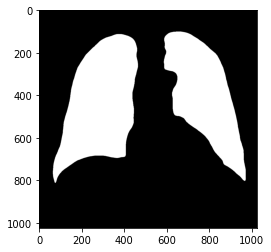

In [ ]:
plt.imshow(masks[0,:,:,0],cmap='gray')

In [ ]:
pdata.save_masks(img_names,masks,mask_save_dir)

# **Save Lung**

## Nếu chưa chạy 2 phần trên và mask đã có sẵn

In [28]:
csv_path = './csv/14/001.csv'
img_load_dir = './train/png/14/001'
img_names = pdata.get_img_names(csv_path)
imgs = pdata.get_imgs(img_names,img_load_dir,size=(1024,1024),gray=True)

In [29]:
# Load mask
mask_load_dir = './train/mask/14/001'
mask_size, masks = pdata.get_masks(img_names,mask_load_dir)

In [30]:
masks = masks.astype(int)

## Apply Mask và lưu lại

In [31]:
lung_save_dir = './train/lung/14/001'
os.makedirs(lung_save_dir,exist_ok=True)
lungs = imgs*masks
for i in tqdm(range(len(img_names)),desc='Save lung'):
  lung_path = os.path.join(lung_save_dir,img_names[i]+'.png')
  cv2.imwrite(lung_path,lungs[i])